# Bank Customer Churn Prediction

## 1.패키지 불러오기

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import skew

## 2. 데이터 불러오기

In [2]:
df = pd.read_csv("Churn_Modelling.csv", index_col = 'RowNumber')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 3. 데이터 확인하기

In [3]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


## 4. 데이터 전처리

연관성이 거의 없는 행 번호, 아이디, 이름은 삭제하는것이 좋습니다.

In [5]:
df.drop(["CustomerId","Surname"], axis=1, inplace=True)

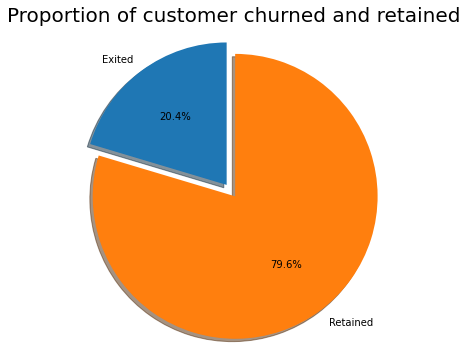

In [6]:
labels = 'Exited', 'Retained'
sizes = [len(df.loc[df['Exited']==1]), len(df.loc[df['Exited']==0])]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

8 대 2 정도의 클래스 비율을 가지고 있는 것을 확인 할 수 있습니다.

### 카테고리 피쳐 시각화

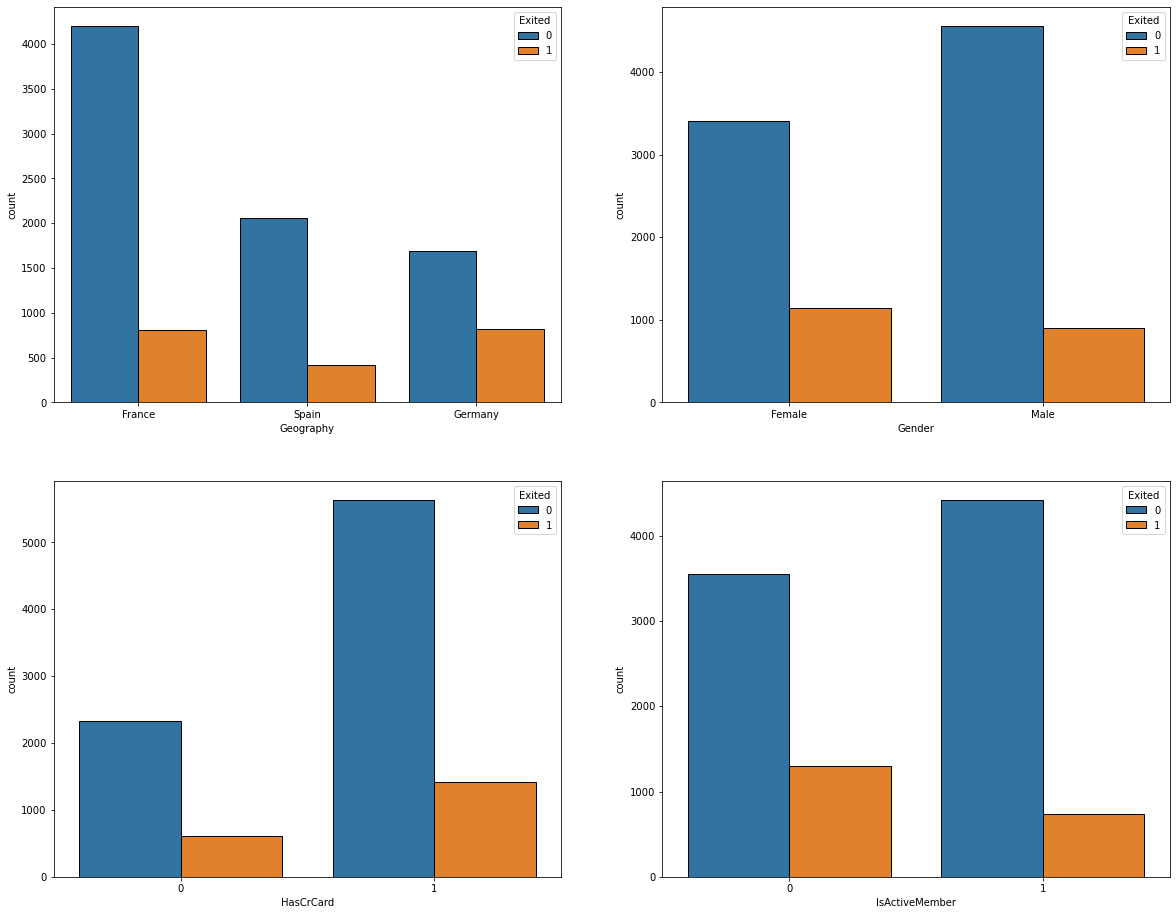

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(20, 16))
plt.subplots_adjust(wspace=0.2)
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=ax[0][0], edgecolor = (0,0,0))
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=ax[0][1], edgecolor = (0,0,0))
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=ax[1][0], edgecolor = (0,0,0))
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=ax[1][1], edgecolor = (0,0,0))
plt.show()

### 실수형 피쳐 시각화

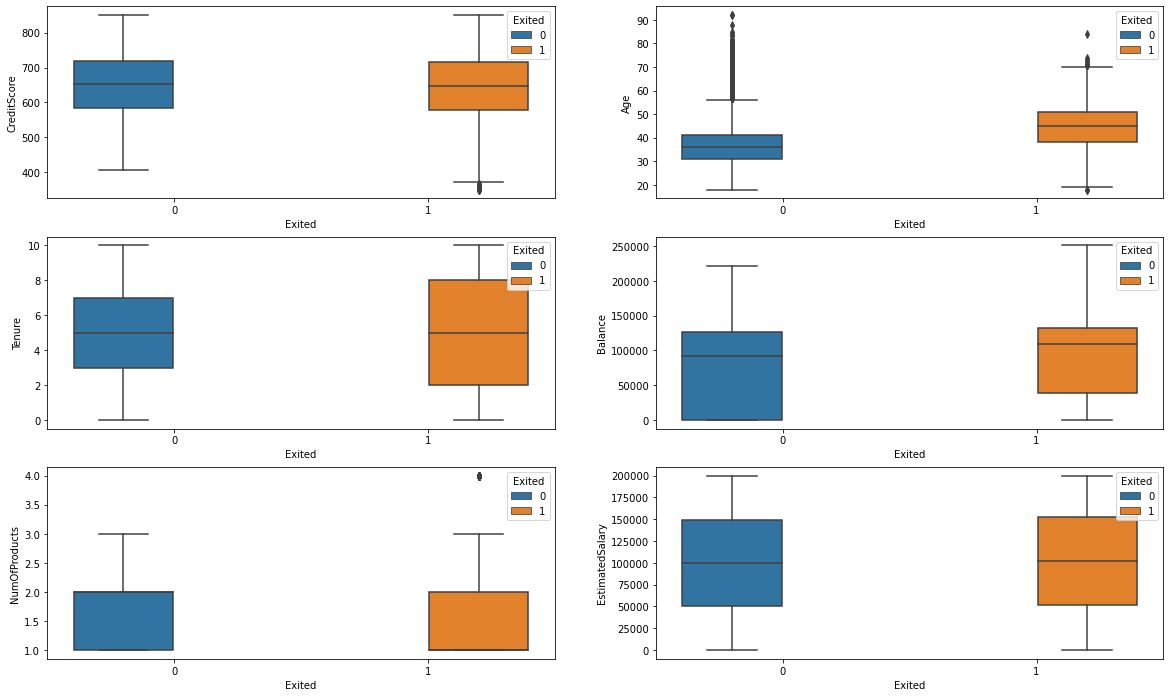

In [8]:
fig, ax = plt.subplots(3, 2, figsize=(20, 12))
plt.subplots_adjust(wspace=0.2)
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=ax[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=ax[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=ax[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=ax[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=ax[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=ax[2][1])
plt.show()

In [9]:
df = pd.get_dummies(df,columns=['Gender','Geography'])

In [10]:
df.columns[abs(skew(df)) > .5]

Index(['Age', 'NumOfProducts', 'HasCrCard', 'Exited', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')

In [11]:
df['Tenure/Age'] = df.Tenure / df.Age

In [12]:
df['cre/Age'] = df.CreditScore / df.Age

In [13]:
df['pro/Age'] = df.NumOfProducts / df.Age

In [14]:
df['est/Age'] = df.EstimatedSalary / df.Age

In [15]:
df['bal/est'] = df.Balance / df.EstimatedSalary 

In [16]:
df['bal/age'] = df.Balance / df.Age 

In [17]:
df.corr()['Exited'].sort_values()[::-1]

Exited               1.000000
Age                  0.285323
Geography_Germany    0.173488
Balance              0.118533
Gender_Female        0.106512
bal/est              0.025558
bal/age              0.017238
EstimatedSalary      0.012097
HasCrCard           -0.007138
Tenure              -0.014001
CreditScore         -0.027094
NumOfProducts       -0.047820
Geography_Spain     -0.052667
est/Age             -0.103080
Geography_France    -0.104955
Gender_Male         -0.106512
Tenure/Age          -0.121641
IsActiveMember      -0.156128
pro/Age             -0.193276
cre/Age             -0.253437
Name: Exited, dtype: float64

### 데이터셋 구분

In [18]:
df_m = df.copy() #minmax

In [19]:
df_s = df.copy()# standard

### Scaler 적용

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#### Min-Max Scaler

In [21]:
scale_cols = ['CreditScore','Tenure','NumOfProducts', 'Age','Balance', 'cre/Age', 'est/Age', 'bal/est', 'bal/age','EstimatedSalary']

In [22]:
m_scaler = MinMaxScaler()

In [23]:
df_m[scale_cols] = m_scaler.fit_transform(df_m[scale_cols])

#### StandardScaler

In [24]:
s_scaler = StandardScaler()

In [25]:
df_s[scale_cols] = s_scaler.fit_transform(df_s[scale_cols])

## 5. 모델링

In [26]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score,average_precision_score, confusion_matrix, precision_score, recall_score, roc_auc_score

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier, VotingClassifier,BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [27]:
def eval_model(model):
    models.append(model.__class__.__name__)

    try:
        grid_model = GridSearchCV(model, param_grid, cv = kf, refit = True, n_jobs = -1)
        grid_model.fit(X_train, y_train)
        roc_auc = roc_auc_score(y_test, grid_model.predict_proba(X_test)[:, 1])
        score = grid_model.best_score_
        print("최적의 파라미터 조합은 {}".format(grid_model.best_params_))
        print('accucary : ', np.round(score, 4))
        print('roc_auc_score : ', np.round(roc_auc, 4))
    except :
        model.fit(X_train, y_train)
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        score = accuracy_score(model.predict(X_test), y_test)
        print('accucary : ', np.round(score, 4))
        print('roc_auc_score : ', np.round(roc_auc, 4))
    acc.append(score)
    roc.append(roc_auc)

In [28]:
kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 777)

In [29]:
models = []
acc = []
roc = []

### (1) df_m

In [30]:
X = df_m.drop("Exited", axis=1)
y = df_m["Exited"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#### ① GaussianNB

In [32]:
%%time
eval_model(GaussianNB())

accucary :  0.8045
roc_auc_score :  0.7982
Wall time: 25.9 ms


#### ② LogisticRegression

In [33]:
%%time
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [25,50,75, 100,], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
eval_model(LogisticRegression(random_state = 42))

최적의 파라미터 조합은 {'C': 100, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 50, 'penalty': 'l2', 'tol': 1e-05}
accucary :  0.8163
roc_auc_score :  0.7904
Wall time: 13 s


In [34]:
models[1]

'LogisticRegression'

#### ③ SVM

In [35]:
%%time
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['poly', 'rbf']}
eval_model(SVC())

최적의 파라미터 조합은 {'C': 150, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
accucary :  0.8561
roc_auc_score :  0.8371
Wall time: 4min 20s


#### ④ DecisionTreeClassifier

In [36]:
%%time
param_grid = {'criterion' : ['gini','entropy'], 'max_depth' : [3,4,5,6,7], 'min_samples_split' : [2,3,4,5,6],
        'min_samples_leaf' : [2,3,4,5,6]}
eval_model(DecisionTreeClassifier())

최적의 파라미터 조합은 {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 6}
accucary :  0.8582
roc_auc_score :  0.8471
Wall time: 23.4 s


#### ⑤ RandomForestClassifier

In [37]:
%%time
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],
              'n_estimators':[50,100,200, 300, 500],'min_samples_split': [3, 5, 6, 7]}
eval_model(RandomForestClassifier(random_state = 777))

최적의 파라미터 조합은 {'max_depth': 8, 'max_features': 4, 'min_samples_split': 5, 'n_estimators': 200}
accucary :  0.8644
roc_auc_score :  0.8729
Wall time: 42min 19s


#### ⑥ KNeighborsClassifier

In [38]:
%%time
param_grid = {'n_neighbors' : [3,4,5,6,7]}
eval_model(KNeighborsClassifier())

최적의 파라미터 조합은 {'n_neighbors': 7}
accucary :  0.8169
roc_auc_score :  0.7671
Wall time: 2.79 s


#### ⑦ SGDClassifier

In [39]:
%%time
param_grid = {'loss' : ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
         'alpha' : [0.0001, 0.005, 0.001, 0.01, 0.05, 0.1],
        'penalty' : ['l2', 'l1', 'elasticnet'],
        'max_iter' : [2,3,4,5,6], 'tol' : [0.0001, 0.001, 0.01, 0.05]}
eval_model(SGDClassifier(random_state=42))

최적의 파라미터 조합은 {'alpha': 0.001, 'loss': 'log', 'max_iter': 3, 'penalty': 'l1', 'tol': 0.0001}
accucary :  0.8129
roc_auc_score :  0.781
Wall time: 1min 6s


#### ⑧ GradientBoostingClassifier

In [40]:
%%time
param_grid = {"loss" : ["deviance"], "learning_rate" : [0.01, 0.025, 0.05, 0.075, 0.1],
    "max_depth":[4,5,6,7], "n_estimators" : [25, 50,100, 150,],
        'subsample' : [0.7,0.8,0.9,1.0]}
eval_model(GradientBoostingClassifier(random_state=42))

최적의 파라미터 조합은 {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 4, 'n_estimators': 50, 'subsample': 0.9}
accucary :  0.866
roc_auc_score :  0.8727
Wall time: 23min 29s


#### ⑨ MLPClassifier

In [41]:
%%time
param_grid = {'activation' : ['identity', 'logistic', 'tanh', 'relu'],
        'solver' : ['lbfgs', 'sgd', 'adam'], 'max_iter' : [50,100,150,200,250],
        'learning_rate' : ['constant', 'invscaling', 'adaptive']}
eval_model(MLPClassifier(random_state=42))

최적의 파라미터 조합은 {'activation': 'relu', 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}
accucary :  0.86
roc_auc_score :  0.8692
Wall time: 23min 24s


#### ⑩ ExtraTreeClassifier

In [42]:
%%time
param_grid = {'min_samples_split' : [3,5,7,9], 'criterion' : ['gini', 'entropy'],
        'max_depth' : [3,4,5,6,7]}
eval_model(ExtraTreeClassifier(random_state=42))

최적의 파라미터 조합은 {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 5}
accucary :  0.8169
roc_auc_score :  0.7387
Wall time: 1.05 s


#### ⑪ AdaBoostClassifier

In [43]:
%%time
param_grid = {'n_estimators' : [50,100,150,200,500], 'learning_rate' : [0.001, 0.005, 0.01, 0.05, 0.1, 1]}
eval_model(AdaBoostClassifier(random_state=42))

최적의 파라미터 조합은 {'learning_rate': 0.1, 'n_estimators': 200}
accucary :  0.8564
roc_auc_score :  0.8672
Wall time: 2min 10s


#### ⑫ LinearDiscriminantAnalysis

In [44]:
%%time
eval_model(LinearDiscriminantAnalysis())

accucary :  0.8075
roc_auc_score :  0.7822
Wall time: 275 ms


#### ⑬ XGBClassifier

In [45]:
%%time
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
eval_model(XGBClassifier(random_state = 2020))

최적의 파라미터 조합은 {'gamma': 0.001, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 20}
accucary :  0.8652
roc_auc_score :  0.8789
Wall time: 12min 46s


#### ⑭ LGBMClassifier

In [46]:
%%time
param_grid = {'n_estimators' : [100,200, 300,400,500], 'num_iterations' : [100,150,200],
        'learning_rate' : [0.001,0.005, 0.01, 0.05, 0.1], 'max_depth' : [3,4,5,6,7],
        'num_leaves' : [20,30,40,100]}
eval_model(LGBMClassifier(random_state =777))

최적의 파라미터 조합은 {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100, 'num_iterations': 100, 'num_leaves': 20}
accucary :  0.8646
roc_auc_score :  0.8779
Wall time: 22min 51s


### (2) df_s

In [47]:
X = df_s.drop("Exited", axis=1)
y = df_s["Exited"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 777)

#### ① GaussianNB

In [49]:
%%time
eval_model(GaussianNB())

accucary :  0.815
roc_auc_score :  0.7928
Wall time: 236 ms


#### ② LogisticRegression

In [50]:
%%time
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [25,50,75, 100,], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
eval_model(LogisticRegression(random_state = 42))

최적의 파라미터 조합은 {'C': 50, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 50, 'penalty': 'l2', 'tol': 1e-05}
accucary :  0.815
roc_auc_score :  0.7696
Wall time: 13.5 s


#### ③ SVM

In [51]:
%%time
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['poly', 'rbf']}
eval_model(SVC())

최적의 파라미터 조합은 {'C': 100, 'gamma': 0.1, 'kernel': 'poly', 'probability': True}
accucary :  0.8584
roc_auc_score :  0.1579
Wall time: 15min 29s


#### ④ DecisionTreeClassifier

In [52]:
%%time
param_grid = {'criterion' : ['gini','entropy'], 'max_depth' : [3,4,5,6,7], 'min_samples_split' : [2,3,4,5,6],
        'min_samples_leaf' : [2,3,4,5,6]}
eval_model(DecisionTreeClassifier(random_state = 777))

최적의 파라미터 조합은 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 2}
accucary :  0.86
roc_auc_score :  0.8288
Wall time: 21.2 s


#### ⑤ RandomForestClassifier

In [53]:
%%time
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],
              'n_estimators':[50,100,200, 300, 500],'min_samples_split': [3, 5, 6, 7]}
eval_model(RandomForestClassifier(random_state = 777))

최적의 파라미터 조합은 {'max_depth': 8, 'max_features': 6, 'min_samples_split': 7, 'n_estimators': 100}
accucary :  0.8648
roc_auc_score :  0.8611
Wall time: 39min 33s


#### ⑥ KNeighborsClassifier

In [54]:
%%time
param_grid = {'n_neighbors' : [3,4,5,6,7]}
eval_model(KNeighborsClassifier())

최적의 파라미터 조합은 {'n_neighbors': 6}
accucary :  0.8394
roc_auc_score :  0.805
Wall time: 3.38 s


#### ⑦ SGDClassifier

In [55]:
%%time
param_grid =  {'loss' : ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
         'alpha' : [0.0001, 0.005, 0.001, 0.01, 0.05, 0.1],
        'penalty' : ['l2', 'l1', 'elasticnet'],
        'max_iter' : [2,3,4,5,6], 'tol' : [0.0001, 0.001, 0.01, 0.05]}
eval_model(SGDClassifier(random_state = 777))

최적의 파라미터 조합은 {'alpha': 0.005, 'loss': 'log', 'max_iter': 4, 'penalty': 'l2', 'tol': 0.0001}
accucary :  0.8134
roc_auc_score :  0.7677
Wall time: 1min 8s


#### ⑧ GradientBoostingClassifier

In [56]:
%%time
param_grid = {"loss" : ["deviance"], "learning_rate" : [0.01, 0.025, 0.05, 0.075, 0.1],
    "max_depth":[4,5,6,7], "n_estimators" : [25, 50,100, 150,],
        'subsample' : [0.7,0.8,0.9,1.0]}
eval_model(GradientBoostingClassifier(random_state=42))

최적의 파라미터 조합은 {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}
accucary :  0.8665
roc_auc_score :  0.8635
Wall time: 23min 53s


#### ⑨ MLPClassifier

In [57]:
%%time
param_grid = {'activation' : ['identity', 'logistic', 'tanh', 'relu'],
        'solver' : ['lbfgs', 'sgd', 'adam'], 'max_iter' : [50,100,150,200,250],
        'learning_rate' : ['constant', 'invscaling', 'adaptive']}
eval_model(MLPClassifier(random_state = 777))

최적의 파라미터 조합은 {'activation': 'logistic', 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'lbfgs'}
accucary :  0.8604
roc_auc_score :  0.86
Wall time: 25min 10s


#### ⑩ ExtraTreeClassifier

In [58]:
%%time
param_grid = {'min_samples_split' : [3,5,7,9], 'criterion' : ['gini', 'entropy'],
        'max_depth' : [3,4,5,6,7]}
eval_model(ExtraTreeClassifier(random_state = 777))

최적의 파라미터 조합은 {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 3}
accucary :  0.8185
roc_auc_score :  0.7316
Wall time: 1.09 s


#### ⑪ AdaBoostClassifier

In [60]:
%%time
param_grid = {'n_estimators' : [50,100,150,200,500], 'learning_rate' : [0.001, 0.005, 0.01, 0.05, 0.1, 1]}
eval_model(AdaBoostClassifier(random_state = 777))

최적의 파라미터 조합은 {'learning_rate': 0.1, 'n_estimators': 150}
accucary :  0.8569
roc_auc_score :  0.845
Wall time: 1min 57s


#### ⑫ LinearDiscriminantAnalysis

In [61]:
%%time
eval_model(LinearDiscriminantAnalysis())

accucary :  0.8135
roc_auc_score :  0.7633
Wall time: 161 ms


#### ⑬ XGBClassifier

In [62]:
%%time
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],
              'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
eval_model(XGBClassifier(random_state = 777))

최적의 파라미터 조합은 {'gamma': 0.01, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100}
accucary :  0.8642
roc_auc_score :  0.8668
Wall time: 11min 53s


#### ⑭ LGBMClassifier

In [63]:
%%time
param_grid = {'n_estimators' : [100,200, 300,400,500], 'learning_rate' : [0.001,0.005, 0.01, 0.05, 0.1], 
         'max_depth' : [3,4,5,6,7], 'num_leaves' : [20,30,40,100]}
eval_model(LGBMClassifier(random_state = 777))

최적의 파라미터 조합은 {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'num_leaves': 20}
accucary :  0.8645
roc_auc_score :  0.8628
Wall time: 13min 35s


In [64]:
M = ['GaussianNB', 'LogisticRegression','SVM','DecisionTreeClassifier','RandomForestClassifier', 'KNeighborsClassifier',
                'SGDClassifier', 'GradientBoostingClassifier', 'MLPClassifier', 'ExtraTreeClassifier',
               'AdaBoosClassifier', 'LinearDiscriminantAnalysis', 'XGBClassifier','LGBMClassifier']

In [65]:
acc_m = acc[:14]
acc_s = acc[14:28]
roc_m = roc[:14]
roc_s = roc[14:28]

In [66]:
s_df = pd.DataFrame({'MODEL' : M, 'MinMax_acc' : acc_m, 'MinMax_roc' : roc_m, 'Standard_acc' : acc_s, 'Standard_roc' : roc_s})
s_df.head()

,MODEL,MinMax_acc,MinMax_roc,Standard_acc,Standard_roc
0,GaussianNB,0.804500,0.798174,0.815000,0.792807
1,LogisticRegression,0.816250,0.790414,0.815000,0.769633
2,SVM,0.856125,0.837112,0.858375,0.157932
3,DecisionTreeClassifier,0.858250,0.847141,0.860000,0.828816
4,RandomForestClassifier,0.864375,0.872858,0.864750,0.861071


In [67]:
s_df

,MODEL,MinMax_acc,MinMax_roc,Standard_acc,Standard_roc
0,GaussianNB,0.804500,0.798174,0.815000,0.792807
1,LogisticRegression,0.816250,0.790414,0.815000,0.769633
2,SVM,0.856125,0.837112,0.858375,0.157932
3,DecisionTreeClassifier,0.858250,0.847141,0.860000,0.828816
4,RandomForestClassifier,0.864375,0.872858,0.864750,0.861071
5,KNeighborsClassifier,0.816875,0.767137,0.839375,0.805031
6,SGDClassifier,0.812875,0.781013,0.813375,0.767650
7,GradientBoostingClassifier,0.866000,0.872724,0.866500,0.863534
8,MLPClassifier,0.860000,0.869218,0.860375,0.860005
9,ExtraTreeClassifier,0.816875,0.738651,0.818500,0.731575


### 시각화로 결과 확인 하기

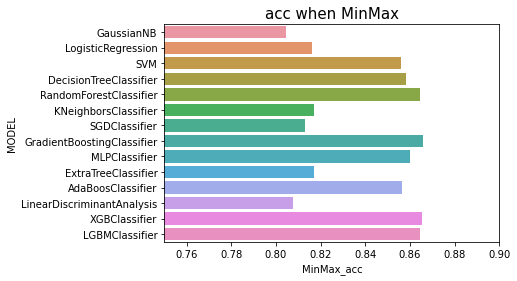

In [68]:
sns.barplot(x = s_df.MinMax_acc, y = s_df.MODEL)
plt.xlim(0.75,0.9)
plt.title('acc when MinMax', size = 15)
plt.show()

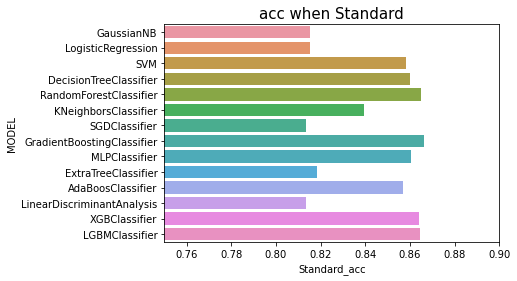

In [69]:
sns.barplot(x = s_df.Standard_acc, y = s_df.MODEL)
plt.xlim(0.75,0.9)
plt.title('acc when Standard', size = 15)
plt.show()

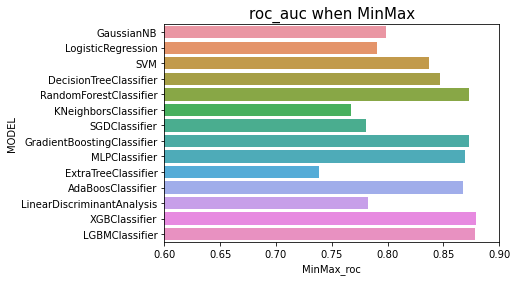

In [70]:
sns.barplot(x = s_df.MinMax_roc, y = s_df.MODEL)
plt.xlim(0.6,0.9)
plt.title('roc_auc when MinMax', size = 15)
plt.show()

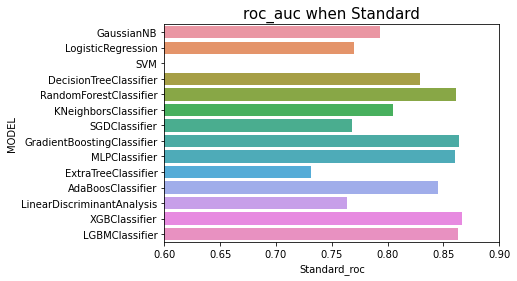

In [71]:
sns.barplot(x = s_df.Standard_roc, y = s_df.MODEL)
plt.xlim(0.6,0.9)
plt.title('roc_auc when Standard', size = 15)
plt.show()

#### 가장 우수한 모델은 데이터의 상태에 따라 혹은 파라미터 조정에 따라 얼마든지 바뀔 수 있습니다.

#### 따라서 위와 같은 문제 해결은 수많은 시험 및 평가 과정이 반복되어야 하는 작업입니다.

#### 지금까지 간단한 이진 분류 문제 해결 포스팅이었고 다음 글에서는 회귀(Regression)에 관련 된 문제를 해결해 보도록 하겠습니다.